<a href="https://colab.research.google.com/github/JaimeLopezGarrido/DMA_Trabajo_Final/blob/main/Ej10_Opcion1_Regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ejercicio 10 - Opción 1 Regresión**

- Materia: Data Mining Avanzado
- Docente: Martin Volpacchio
- Alumnos: Lucía Pereyra Huertas, Gabriel Martina, Jaime López Garrido, Diego Farfán y Analía Ale


# Introducción

Este cuaderno corresponde al Ejercicio 10, Opción 1, del Trabajo Final de la materia Data Mining Avanzado. Su objetivo principal es abordar un problema de regresión utilizando un dataset público obtenido de internet, seleccionando en este caso el dataset California Housing, cuyo propósito es predecir el valor medio de las viviendas. A lo largo del cuaderno se implementan y comparan diferentes modelos de regresión, incluyendo Support Vector Regression (SVR), Random Forest, Gradient Boosting y Multi-Layer Perceptron (MLP).

Se presentan todas las etapas del flujo de trabajo: preprocesamiento de datos, división en conjuntos de entrenamiento y prueba, definición del espacio de búsqueda de hiperparámetros y optimización mediante GridSearch con validación cruzada. El desempeño de los modelos se evalúa utilizando métricas adecuadas para problemas de regresión, como el Error Cuadrático Medio (MSE), su Raíz (RMSE) y el coeficiente de determinación R². Este cuaderno se centra exclusivamente en la tarea de regresión, mientras que la parte de clasificación se trabaja de forma separada en otro cuaderno.

# Librerias


Carga condicional de librerias necesarias para poder correr el codigo completo. Este mecanismo permite que el notebook pueda ejecutarse en cualquier entorno sin necesidad de instalar manualmente cada una de ellas.

In [ ]:
import importlib
import subprocess
import sys

def require(install_name, import_name=None):
    if import_name is None:
        import_name = install_name

    try:
        importlib.import_module(import_name)
        print(f"{import_name} ya está instalado.")
    except ImportError:
        print(f"Instalando {install_name}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", install_name])
    finally:
        globals()[import_name] = importlib.import_module(import_name)

require("pandas")
require("numpy")
require("scikit-learn", "sklearn")
require("matplotlib")
require("seaborn")

import pandas as pd
import numpy as np
import sklearn

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

pandas ya está instalado.
numpy ya está instalado.
sklearn ya está instalado.
matplotlib ya está instalado.
seaborn ya está instalado.


# Dataset


El dataset de regresión utilizado en este trabajo es el conocido California Housing Dataset, un conjunto de datos clásico en problemas de regresión y aprendizaje automático. Este dataset fue construido a partir del censo de California y contiene información socioeconómica y geográfica de distintos distritos del estado.

El conjunto de datos se obtiene desde un repositorio público asociado a material académico y se carga directamente desde internet, asegurando la portabilidad y reproducibilidad del análisis. Cada observación representa un distrito, mientras que las variables explicativas describen características como ingresos, densidad poblacional y ubicación geográfica.

La variable objetivo es **median_house_value**, que representa el valor medio de las viviendas en cada distrito. El objetivo del modelo es predecir un valor numérico continuo, estimando el precio medio de las viviendas a partir de las variables disponibles.

In [ ]:
# Dataset de REGRESIÓN (California Housing)
url_regresion = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
dataset_r = pd.read_csv(url_regresion)

# Exploración inicial
print("DATASET REGRESIÓN")
print("Dimensiones:", dataset_r.shape)
print("\nColumnas:\n")
print(dataset_r.columns)
print("\nTipos de datos:\n")
print(dataset_r.dtypes)
print("\nValores faltantes por columna:\n")
print(dataset_r.isnull().sum())
print("\nPrimeras filas:\n")
display(dataset_r.head())
print("\nUltimas filas:\n")
display(dataset_r.tail())
print("\nResumen estadístico:\n")
display(dataset_r.describe(include="all"))

DATASET REGRESIÓN
Dimensiones: (20640, 10)

Columnas:

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

Tipos de datos:

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

Valores faltantes por columna:

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Primeras filas:



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY



Ultimas filas:



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND



Resumen estadístico:



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


# Preprocesamiento

In [ ]:
# Variable objetivo
target = "median_house_value"

# Features y target
X = dataset_r.drop(columns=[target])
y = dataset_r[target]

División en conjuntos de entrenamiento y prueba.

En este caso se decide dividir en un 75% entrenamiento y un 25% restante para prueba.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42
)

In [ ]:
# Columnas numéricas y categóricas
num_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_features = X.select_dtypes(include=["object"]).columns.tolist()

# Pipeline
num_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# One hot Encoder
cat_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Preprocesador
preprocessor = ColumnTransformer(transformers=[
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
])

---
# Support Vector Regression (SVR)

Para ajustar el modelo SVR usamos GridSearch con validación cruzada. La idea fue probar distintas combinaciones de los parámetros C y epsilon para ver cuál funcionaba mejor, asegurándonos de que el resultado sea confiable y no dependa de una sola prueba. Buscamos el equilibrio justo para que el modelo aprenda bien sin memorizar los datos, y nos quedamos con la configuración que tuvo el error más bajo en promedio.

In [ ]:
svr = SVR()

In [ ]:
pipe_svr = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", svr)
])

param_grid_svr = {
    "model__kernel": ["rbf", "linear"],
    "model__C": [0.1, 1, 10],
    "model__epsilon": [0.01, 0.1, 0.2],
    "model__gamma": ["scale", "auto"]
}

grid_svr = GridSearchCV(
    pipe_svr,
    param_grid_svr,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1,
    verbose=2
)

grid_svr.fit(X_train, y_train)

print("Mejores hiperparámetros SVR:")
print(grid_svr.best_params_)

print("\nMejor score CV (RMSE negativo):")
print(grid_svr.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Mejores hiperparámetros SVR:
{'model__C': 10, 'model__epsilon': 0.01, 'model__gamma': 'scale', 'model__kernel': 'linear'}

Mejor score CV (RMSE negativo):
-85263.22823299449


In [ ]:
# Predicciones
y_pred = grid_svr.predict(X_test)

# Métricas
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Evaluación en Test:")
print("RMSE:", rmse)
print("R2:", r2)

Evaluación en Test:
RMSE: 82194.2366391711
R2: 0.48943469624460345


---
# Multi-Layer Perceptron Regressor (MLP)

De la misma forma para ajustar el MLP usamos GridSearch con validación cruzada. La idea fue probar distintas formas de armar la red, cambiando la cantidad de neuronas y la regularización, para ver cuál funcionaba mejor y asegurar un resultado confiable. Buscamos el equilibrio para que el modelo entienda los patrones complejos sin memorizar los datos, y nos quedamos con la configuración que logró el error más bajo en promedio.

In [ ]:
mlp = MLPRegressor(
    random_state=42,
    max_iter=1000
)

pipe_mlp = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", mlp)
])

param_grid_mlp = {
    "model__hidden_layer_sizes": [(50,), (100,), (50, 50)],
    "model__activation": ["relu", "tanh"],
    "model__alpha": [0.0001, 0.001, 0.01],
    "model__learning_rate": ["constant", "adaptive"]
}

In [ ]:
grid_mlp = GridSearchCV(
    pipe_mlp,
    param_grid_mlp,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1,
    verbose=2
)

grid_mlp.fit(X_train, y_train)

print("Mejores hiperparámetros MLP:")
print(grid_mlp.best_params_)

print("\nMejor score CV (RMSE negativo):")
print(grid_mlp.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Mejores hiperparámetros MLP:
{'model__activation': 'relu', 'model__alpha': 0.001, 'model__hidden_layer_sizes': (50, 50), 'model__learning_rate': 'constant'}

Mejor score CV (RMSE negativo):
-61688.19844761883


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Predicciones
y_pred = grid_mlp.predict(X_test)

# Métricas
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Evaluación en Test:")
print("RMSE:", rmse)
print("R2:", r2)

Evaluación en Test:
RMSE: 61257.15868698613
R2: 0.7164156478459772


---
# Random Forest Regressor

Para el Random Forest probamos distintas combinaciones, cambiando la cantidad de árboles y la profundidad, para ver cuál funcionaba mejor. El objetivo fue lograr que el modelo aprenda bien los patrones generales sin sobreajustarse, y al final como en todos los demas modelos evaluamos el desempeño del ganador usando las métricas de error y R².

In [ ]:
rf = RandomForestRegressor(
    random_state=42,
    n_jobs=-1
)

pipe_rf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", rf)
])

In [ ]:
# Búsqueda de hiperparámetros
param_grid_rf = {
    "model__n_estimators": [100, 200],
    "model__max_depth": [None, 10, 20],
    "model__min_samples_split": [2, 5],
    "model__min_samples_leaf": [1, 2]
}

grid_rf = GridSearchCV(
    pipe_rf,
    param_grid_rf,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1,
    verbose=2
)

In [ ]:
# Entrenamiento
grid_rf.fit(X_train, y_train)

print("Mejores hiperparámetros Random Forest:")
print(grid_rf.best_params_)

print("\nMejor score CV (RMSE negativo):")
print(grid_rf.best_score_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Mejores hiperparámetros Random Forest:
{'model__max_depth': None, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 200}

Mejor score CV (RMSE negativo):
-49523.94398745218


In [ ]:
# Predicciones
y_pred = grid_rf.predict(X_test)

# Métricas
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Evaluación en Test:")
print("RMSE:", rmse)
print("R2:", r2)

Evaluación en Test:
RMSE: 48652.08157713155
R2: 0.821116032723624


---
# Gradient Boosting Regressor

Por ultimo para Gradient Boosting también usamos GridSearch y validación cruzada, en este caso para ajustar la cantidad de árboles, la velocidad de aprendizaje y la profundidad.

In [ ]:
gbr = GradientBoostingRegressor(
    random_state=42
)


pipe_gbr = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", gbr)
])

In [ ]:
# Búsqueda de hiperparámetros
param_grid_gbr = {
    "model__n_estimators": [100, 200],
    "model__learning_rate": [0.05, 0.1],
    "model__max_depth": [3, 5],
    "model__subsample": [0.8, 1.0]
}

grid_gbr = GridSearchCV(
    pipe_gbr,
    param_grid_gbr,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1,
    verbose=2
)

In [ ]:
# Entrenamiento
grid_gbr.fit(X_train, y_train)

print("Mejores hiperparámetros Gradient Boosting:")
print(grid_gbr.best_params_)

print("\nMejor score CV (RMSE negativo):")
print(grid_gbr.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Mejores hiperparámetros Gradient Boosting:
{'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 200, 'model__subsample': 0.8}

Mejor score CV (RMSE negativo):
-48563.388324514235


In [ ]:
# Predicciones
y_pred = grid_gbr.predict(X_test)

# Métricas
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Evaluación en Test:")
print("RMSE:", rmse)
print("R2:", r2)

Evaluación en Test:
RMSE: 47854.8593678205
R2: 0.8269304541246247


---
# Comparación de Modelos

Tener en cuenta que RMSE es la "Raíz del Error Cuadrático Medio", cuanto menor sea su valor menor sera la distancia entre el valor real y el predicho.

- **RMSE_Test**: Es la Raíz del Error Cuadrático Medio en el conjunto de test. Mide cuánto se equivocan las predicciones del modelo sobre datos no vistos. Está en las mismas unidades que la variable objetivo

- **R2_Test:** Es el coeficiente de determinación en test. Indica qué proporción de la variabilidad de "y" explica el modelo en el set de prueba.

- **RMSE_CV**: Es la Raíz del Error Cuadrático Medio promedio obtenida durante la validación cruzada del GridSearch. Aparece con signo negativo porque GridSearchCV maximiza el score, y para errores usa neg_root_mean_squared_error, por eso se pone el "-" adelante para volverlo positivo. Representa el error esperado del modelo al generalizar

In [ ]:
# Comparación de modelos de REGRESIÓN

results = []

results.append({
    "Modelo": "SVR",
    "RMSE_Test": np.sqrt(mean_squared_error(y_test, grid_svr.predict(X_test))),
    "R2_Test": r2_score(y_test, grid_svr.predict(X_test)),
    "RMSE_CV": -grid_svr.best_score_
})

results.append({
    "Modelo": "MLP",
    "RMSE_Test": np.sqrt(mean_squared_error(y_test, grid_mlp.predict(X_test))),
    "R2_Test": r2_score(y_test, grid_mlp.predict(X_test)),
    "RMSE_CV": -grid_mlp.best_score_
})

results.append({
    "Modelo": "Random Forest",
    "RMSE_Test": np.sqrt(mean_squared_error(y_test, grid_rf.predict(X_test))),
    "R2_Test": r2_score(y_test, grid_rf.predict(X_test)),
    "RMSE_CV": -grid_rf.best_score_
})

results.append({
    "Modelo": "Gradient Boosting",
    "RMSE_Test": np.sqrt(mean_squared_error(y_test, grid_gbr.predict(X_test))),
    "R2_Test": r2_score(y_test, grid_gbr.predict(X_test)),
    "RMSE_CV": -grid_gbr.best_score_
})

results_df = pd.DataFrame(results)
results_df

,Modelo,RMSE_Test,R2_Test,RMSE_CV
0,SVR,82194.236639,0.489435,85263.228233
1,MLP,61257.158687,0.716416,61688.198448
2,Random Forest,48652.081577,0.821116,49523.943987
3,Gradient Boosting,47854.859368,0.826930,48563.388325


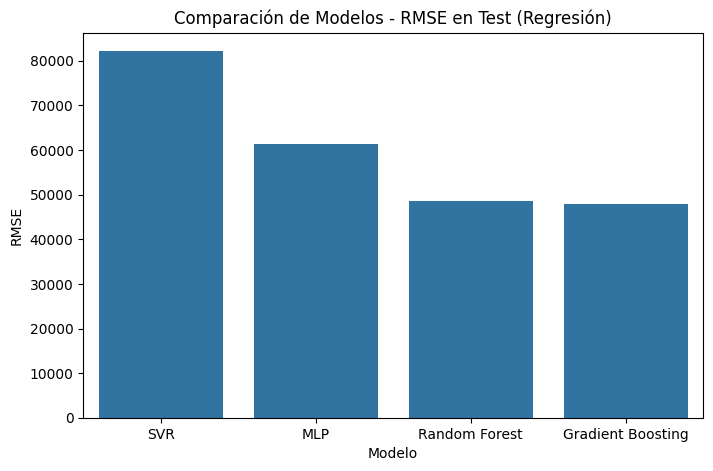

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=results_df,
    x="Modelo",
    y="RMSE_Test"
)
plt.title("Comparación de Modelos - RMSE en Test (Regresión)")
plt.ylabel("RMSE")
plt.xlabel("Modelo")
plt.show()

---
# Conclusión

Se resolvió la parte de regresión del Ejercicio 10 utilizando el dataset California Housing. Manteniendo la misma estructura metodológica aplicada en la clasificación, se desarrolló un flujo de trabajo completo que abarcó desde el preprocesamiento y la división de datos hasta la optimización de hiperparámetros, comparando el desempeño de cuatro modelos: SVR, MLP, Random Forest y Gradient Boosting.

Los resultados muestran una clara ventaja de los modelos de ensamble. El Gradient Boosting fue el ganador con el error más bajo y un R² de 0.83, seguido muy de cerca por el Random Forest. El MLP tuvo un desempeño intermedio, explicando el 71% de la varianza, mientras que el SVR quedó bastante rezagado con un R² de 0.49, lo que indica que le costó capturar la complejidad de los datos. En conclusión, para este problema los métodos basados en árboles resultaron ser, por lejos, la opción más robusta.